In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#선형 회귀 분석을 위한 패키지
from sklearn.linear_model import LinearRegression
#학습 및 테스트 데이터 셋 분리를 위한 패키지 
from sklearn.model_selection import train_test_split 

In [3]:
## 2. DATA 불러오기

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")

In [5]:
#3. 데이터 탐색 & 변수 선택

In [6]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [7]:
df.info()   ## hourse power 결측치 처리 필요 하겠는 것을 확인.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [8]:
## 종속 변수 MPG와 다른 변수들 간의 상관 관계 분석. 
## MAtplotlib의 plot 메소에 kind = scater 옵션을 적용하여 산점도 그리기

<Axes: xlabel='model-year', ylabel='mpg'>

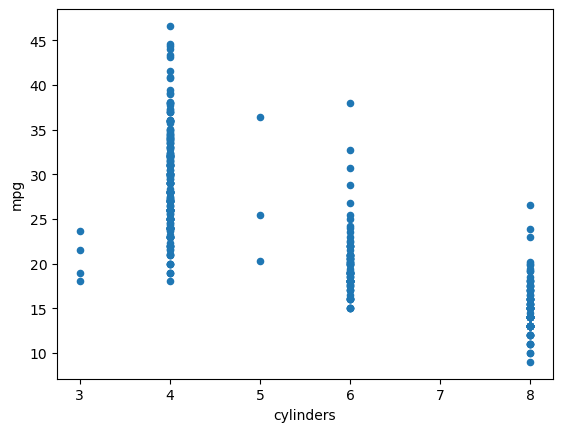

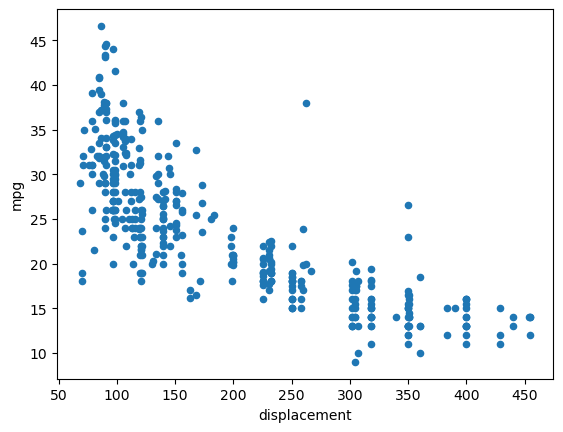

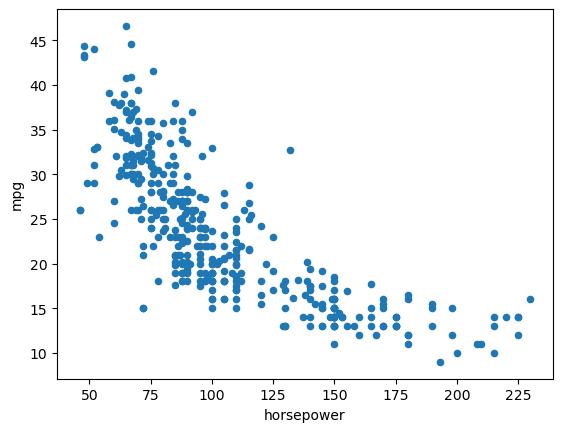

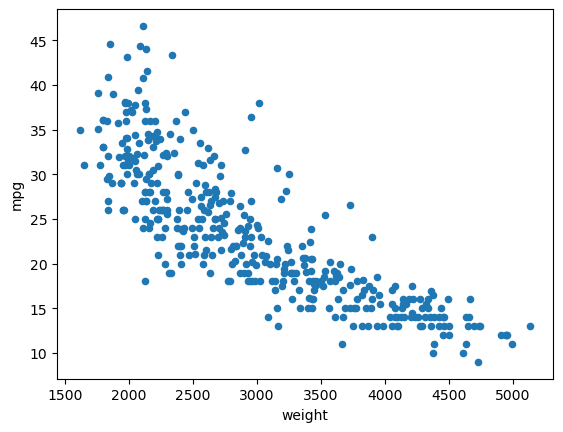

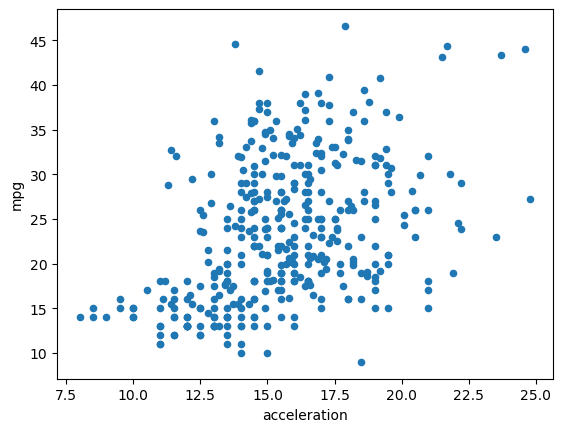

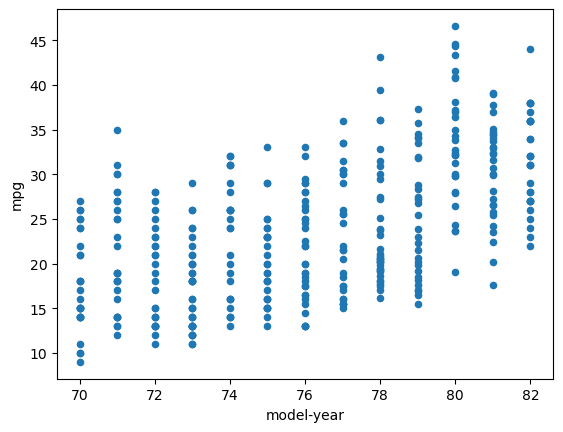

In [10]:
df.plot (kind = "scatter", x = "cylinders", y = "mpg")
df.plot (kind = "scatter", x = "displacement", y = "mpg")
df.plot (kind = "scatter", x = "horsepower", y = "mpg")
df.plot (kind = "scatter", x = "weight", y = "mpg")
df.plot (kind = "scatter", x = "acceleration", y = "mpg")
df.plot (kind = "scatter", x = "model-year", y = "mpg")
## 음의 사관 곈계를 갖는 weigt 와 hosrpower를 사용해 보자. ( 음의 상관 관계가 명확함)B

In [ ]:
## 4. data 전처리

In [12]:
df = df.dropna(axis=0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           396 non-null    float64
 1   cylinders     396 non-null    int64  
 2   displacement  396 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        396 non-null    int64  
 5   acceleration  396 non-null    float64
 6   model-year    396 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.8 KB


In [ ]:
#5. 분석 data set 준비

In [21]:
X = df[["weight"]]
y = df[['mpg']]

In [22]:
#분석 DATA SET 분할 ( 8:2)
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size = 0.2,  random_state=10)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 1)
(80, 1)
(316, 1)
(80, 1)


In [ ]:
##6. 데이터 분석 수행

In [24]:
#Linear Regression 객체 생성
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
## 회귀식의 기울기와 y 절편을 출력
print("기울기 a:", lr.coef_)
print("y절편 b: ", lr.intercept_)

기울기 a: [[-0.00774371]]
y절편 b:  [46.62501835]


In [26]:
##학습이 완료된 lr객체에서 테스트 데이터 셋으로 예측
pred = lr.predict(X_test)

7. 성능 평가 및 시각화 

In [29]:
#MODEL 성능 평가 .  테스트 데이터 셋. 
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

0.7015633872576372


In [ ]:
## 이 결과를 보면, 

In [30]:
##학습이 완료된 lr 객체에서 학습 데이터셋으로 예측
pred = lr.predict(X_train)
from sklearn.metrics import r2_score
score = r2_score(y_train, pred)
print(score)

0.6875735975346924
